In [1]:
import numpy as np

import pandas as pd

✅ Tasks:

1️⃣ Load the dataset into a Pandas DataFrame.

2️⃣ Handle missing values:

Fill missing salaries with the mean salary.

Drop rows where Performance_Score is missing.

3️⃣ Rename columns:
Change Salary → "Monthly_Salary".

Change Experience → "Years_of_Experience".

4️⃣ Create a new column "Annual_Salary" (Multiply Monthly_Salary by 12).

5️⃣ Create bins for experience levels:

"Junior": 0-3 years

"Mid": 4-7 years

"Senior": 8+ years

Store this in a new column called "Experience_Level".

6️⃣ Find the highest-paid employee.

7️⃣ Find the department with the highest average salary.

8️⃣ Sort employees by Performance Score (Descending Order).

9️⃣ Plot a histogram of employee salaries using Matplotlib.

🔟 (Bonus) Create a bar chart showing the number of employees in each experience level.

In [9]:
df=pd.read_csv("employeesData.csv")

df

,Employee_ID,Name,Age,Department,Monthly_Salary,Experience,Performance_Score,Remote
0,101,John Doe,28,IT,4500.0,3,4.2,1
1,102,Jane Smith,35,HR,5200.0,7,4.8,0
2,103,Michael Brown,40,Sales,6000.0,10,3.9,1
3,104,Emily Davis,26,Marketing,4000.0,2,4.5,1
4,105,David Wilson,50,Finance,7000.0,15,4.1,0
5,106,Linda Martinez,29,IT,NaN,4,4.0,1
6,107,James Anderson,31,Sales,5600.0,6,3.5,0
7,108,Patricia Thomas,45,HR,6500.0,12,4.7,1
8,109,Robert Jackson,39,Finance,6200.0,9,NaN,0
9,110,Mary White,27,Marketing,4800.0,3,4.3,1


In [15]:
df["Monthly_Salary"]=df["Monthly_Salary"].fillna(df["Monthly_Salary"].mean())

df["Monthly_Salary"]=np.round(df["Monthly_Salary"],2)


df.dropna(subset=["Performance_Score"],inplace=True)

df.rename(columns={
    "Experience":"Years_Of_Experience"
},inplace=True)



In [18]:
df["Annual_Salary"]=df["Monthly_Salary"]*12




In [21]:
bins=np.linspace(min(df["Years_Of_Experience"]),max(df["Years_Of_Experience"]),4)

group_names=["Junior", "Mid", "Senior"]


pd.cut(df["Years_Of_Experience"],bins=bins,labels=group_names)

df["Experience_Level"] = pd.cut(df["Years_Of_Experience"], bins=bins, labels=group_names)

df

,Employee_ID,Name,Age,Department,Monthly_Salary,Years_Of_Experience,Performance_Score,Remote,Annual_Salary,Experience_Level
0,101,John Doe,28,IT,4500.00,3,4.2,1,54000.00,Junior
1,102,Jane Smith,35,HR,5200.00,7,4.8,0,62400.00,Mid
2,103,Michael Brown,40,Sales,6000.00,10,3.9,1,72000.00,Mid
3,104,Emily Davis,26,Marketing,4000.00,2,4.5,1,48000.00,NaN
4,105,David Wilson,50,Finance,7000.00,15,4.1,0,84000.00,Senior
5,106,Linda Martinez,29,IT,5533.33,4,4.0,1,66399.96,Junior
6,107,James Anderson,31,Sales,5600.00,6,3.5,0,67200.00,Junior
7,108,Patricia Thomas,45,HR,6500.00,12,4.7,1,78000.00,Senior
9,110,Mary White,27,Marketing,4800.00,3,4.3,1,57600.00,Junior


In [23]:
highest_paid_employee=df.loc[df["Monthly_Salary"].idxmax()]

highest_paid_employee

Employee_ID                     105
Name                   David Wilson
Age                              50
Department                  Finance
Monthly_Salary               7000.0
Years_Of_Experience              15
Performance_Score               4.1
Remote                            0
Annual_Salary               84000.0
Experience_Level             Senior
Name: 4, dtype: object

In [27]:
heighest_depertment=df.groupby(by="Department")["Annual_Salary"].mean()

heighest_depertment.idxmax()

'Finance'

In [35]:

sorted_df=df.sort_values(by="Performance_Score",ascending=False)




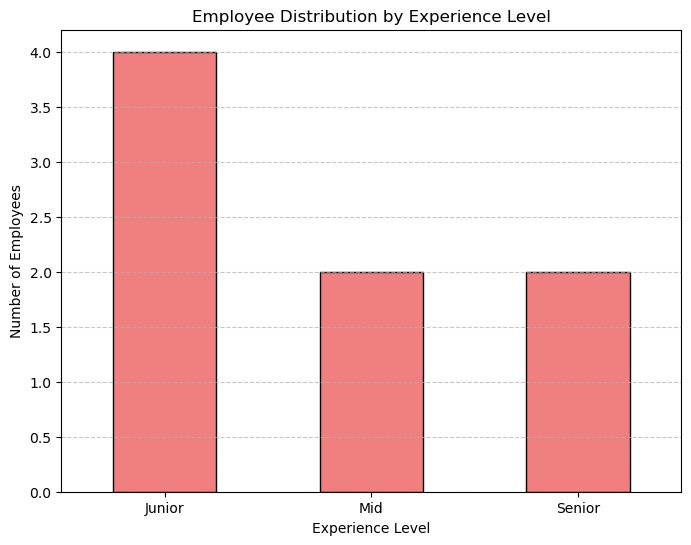

In [37]:
import matplotlib.pyplot as plt
# Count number of employees in each experience level
experience_counts = df["Experience_Level"].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
experience_counts.plot(kind="bar", color="lightcoral", edgecolor="black")
plt.xlabel("Experience Level")
plt.ylabel("Number of Employees")
plt.title("Employee Distribution by Experience Level")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [41]:
experience_counts

Experience_Level
Junior    4
Mid       2
Senior    2
Name: count, dtype: int64

In [40]:
 
 df.to_csv("clean_employee_data.csv",index=False)